# Coursework 1 - Mathematics for Machine Learning

## CID: 01849526

**Colab link:** https://colab.research.google.com/drive/1ThlKBTVtNx2RLy2AfEZp_tjXpsdk6nO6?usp=sharing

***
***

## Part 1: Quickfire questions [3 points]

#### Question 1 (True risk / Empirical risk):

True risk is defined as the expected loss for a chosen loss function $L$ and model $f ∈ F$ (where $F$ is a function space and the points $(\textbf{x}, \textbf{y})$ are sampled from a distribution D).

$$R(f) = E_D[L(f(\textbf{x}), \textbf{y})]$$

But in empirical risk is the unbiased estimator of the true risk. We assume that $(\textbf{x}^i, \textbf{y}^i)_{i=1}^N \sim D$ are i.i.d.

$$\hat{R}(f) = \frac{1}{N} ∑_{i=1}^N L(f(\textbf{x}^i), \textbf{y}^i)$$

So, the empirical risk is just an estimator. It is useful because in reality the distribution $D$ is not always known.

#### Question 2 ('Large' or 'rich' hypothesis class):

A larger or more rich hypothesis class will cover more functions, hence it is more likely that the true function will be within the set. It also means that the function classes can generate more vectors which better correlate with random noise on average. This can be desirable because the model might be able to capture finer details. However, the richer the class the more likely it is we select a function that could overfit the data as the bound on the generalisation error is larger.

#### Question 3 (Dataset splitting):

Performance on validation data isn't guaranteed to match the performance on unseen data. The validation set is not representative of unseen data in general i.e. there may be variations in data distribution. Moreover, there is no indication of using K-fold cross validation, where we randomly choose training and validation points. Instead this approach set aside 20% of the data for validation; this may lead to overfitting.

#### Question 4 (Occam’s razor):

Occam's razor states that among competing hypotheses which explain known observations well, we should choose the simplest one. In relation to naturally occuring data, the theorem suggest that simpler models that capture the essential features of the data are preferable to overly complex model that may overfit to noise and irrelevant details. In the image setting, this translates to simpler models which can effectively pick out essential image features, and not get swayed by random noise similar to the panda example we saw in lectures.

#### Question 5 (Generalisation error):

A model represented by $f^*$ is a good model if it is close to the true model $\hat{f}$. The true model will fit to known and unknown data 'perfectly'. Hence a smaller generalisation error is better by definition. The error can be approximated by:

$$ \frac{1}{N} ∑_{i=1}^N L(f(\textbf{x}^i), \textbf{y}^i) - \frac{1}{M} ∑_{i=1}^M L(f(\textbf{x}^i), \textbf{y}^i)$$

where $(\textbf{x}^i, \textbf{y}^i)_{i=1}^M$ is a new i.i.d test sample. So we want a small train and generalisation error.

#### Question 6 (Rademacher complexity pt1):

A high Rademacher complexity implies that the set $F$ has the capacity to fit rando noise in the dataset well, which could indicate the set is flexible and can distinguish patterns and fluctuations well. However, this may also indicate an overly complex set which is prone to overfitting.

#### Question 7 (Rademacher complexity pt2):

The bound shown in (73) of the lecture notes only depends on the size of the function class, it doesn't illustrate the whether the functions fit well to the data and is indifferent to what the functions actually are. The bound shows that the richer the function class is, the larger the upper bound on the generalisation error and so allows for overfitting. Rademacher complexity, on the other hand, captures this to some extent by considering the correlation between the function and random noise.

#### Question 8 (Regularisation term in the loss function):

Including a regularization term in the loss function helps prevent overfitting by penalizing overly complex models. It results in a choice of parameters that make a tradeoff between fitting to the train data and being small (most regularization techniques remove irrelavent parameters by sending them to zero or close to zero). This improves generalization and encourages simpler solutions.

#### Question 9 (Momentum gradient descent):

Gradient descent, with a constant learning rate, may have issues with convergence, This could be because of the pathological curvature of $f$, which is when we have areas of small gradient so progress along certain direction is halted or we observe an oscillatory behaviour about the minima / maxima. Momentum gradient descent, however, involves a memory term which mitigates this problem and helps convergence. If, for example, the gradient reverses sign this could be an indication that the descent is too fast and we should slow down to hit the minimum and vice versa. mMoemntum gradient descent stores the history of gradient terms and so accounts for this.

#### Question 10 (Adam):

Adam is an optimization algorithm which adapts the learning rate for each parameter based on estimates of the gradients' first and second moments. The algorithm:

$$\begin{align*}
m_k &= (1 - β_1)∇_{θ}L(θ_k) + β_1m_{k-1}\\
v_k &= (1-β_2)(∇_{θ}L(θ_k))^2 + β_2v_{k-1}\\
\hat{m}_k &= \frac{m_k}{1 - \beta_1^k}\\
\hat{v}_k &= \frac{v_k}{1 - \beta_2^k} \\
\theta_{k+1} &= \theta_k - α\frac{\hat{m}_k}{\sqrt{\hat{v}_k} + ϵ}
\end{align*}$$

The algoirthm above leverages a momentum approach when updating the first and second moments, whereas updating the parameter vector is similar to a gradient descent method. Ultimately, Adam is a combination of momentum and RMSProp.

#### Question 11 (AdaGrad):

Adagrad is an algorithm for gradient-based optimization which makes use of an adaptive learning rate. It estimates a per-dimenison cumulative magnitude and uses this to adjust the learning rate and fincally updates the parameter. The learning depends on the history of gradients (it is inversley proportional to the square of the gradients) so can be considered to be a momentum approach. Because of that inverse relationship we get that the learning rate decreases over time, which makes it good for convex problems.

$$\begin{align*}
\theta_{k+1} &= \theta_k - ŋ\frac{∇_{θ}L(θ_k)}{\sqrt{s_k}}\\
s_k &= \beta s_{k-1} + (∇_{θ}L(θ_k))^2
\end{align*}
$$



#### Question 12 (Decaying Learning Rate):

A decaying learning rate allows for faster convergence at the early stages of training, which is not the case when the learning rate is too small. This allows the model to quickly reach regions of low loss. Once, we near the minimum the learning rate reduces which induces small adjustments to the model parameters and avoids overshooting the minimum. Also, the algorithm will navigate through challenging "landscapes" (such as plateaus, valleys and local minima more) more effectively, because the small learning rate allows for more exploration in these regions eventually leading to regions of steeper gradient.

***
***

## Part 2: Short-ish proofs [6 points]


### Question 2.1: Bounds on the risk [1 point]


Hoeffdings lemma:

1. Let $X_1, X_2, \ldots, X_m$ be independent random variables with support of $[a_i, b_i]$. For any $ϵ > 0$: $$\begin{align*}
P(S_m - E[S_m] \geq ϵ) &\leq \exp{\frac{-2ϵ^2}{∑_{i}(b_i - a_i)^2}}\\
P(S_m - E[S_m] \leq -ϵ) &\leq \exp{\frac{-2ϵ^2}{∑_{i}(b_i-a_i)^2}}
\end{align*}$$
Note that $L(f(\textbf{x}^i), \textbf{y}^i)$ can be considered to be i.i.d random variables so take these to be the $X_i$'s on the support $[0, 1]$ (i.e. they are bounded by 0 and 1). Define $\hat{R}(f) = \frac{1}{N} ∑_{i=1}^N X_i$, and then we can apply Hoeffding's inequality to obtain the corollary. Note $E[\hat{R}(f)] = R(f)$ so we can multiple both sides by $N$ to get: $$\begin{align*}
P(S_m - E[S_m] \geq N\epsilon) &\leq \exp{\frac{-2N\epsilon^2}{∑_{i}(1 - 0)^2}}\\
P(S_m - E[S_m] \geq N\epsilon) &\leq \exp{-2N\epsilon^2}
\end{align*}$$ This clearly also applies for the other tail.

2. We can see that the bound decreases with the size of the dataset i.e. as $N$ increases $P(|\hat{R}(f) - R(f)| \geq ϵ) \rightarrow 0$, which implies that we achieve a converge in probability between the empirical and true risk.

3. $|F|$ represents the size of the function class and it increases the bound on the empirical risk. So, when we make the hypothesis class larger / richer we make the bound on the generalisation error larger. Therefore, we need a tradeoff between the richness of the hypothesis class and the test loss.



***

### Question 2.2: On semi-definiteness [1 point]

$$\begin{align*}
g(t_1) &= f(x + t_1 v) \\
g(t_2) + g'(t_2)(t_2 - t_1) &= f(x + t_2 v) + ∇f(x + t_2 v) [v(t_2 - t1)]
\end{align*}$$

By convexity of $f$:

$$\begin{align*}
f(x + t_1 v) &\geq f(x + t_2 v) + ∇f(x + t_2 v) [v(t_2 - t1)]\\
g(t_1) &\geq g(t_2) + g'(t_2)(t_2 - t_1)
\end{align*}$$

Hence $g$ is convex.

$$\begin{align*}
g''(t) &= \frac{d}{dt}(∇f(x+tv) f(x+tv))\\
&= v^T \nabla^2f(x+tv)v
\end{align*}$$

by chain rule and product rule. We know that in the 1-D case that $g''(t) \geq 0$, hence $\nabla^2 f(y) \geq 0$ for all $y \in \mathbb{R}^d$.


***

### Question 2.3: A quick recap of momentum [1 point]

1. The orthogonal eigenvectors in $Q$ transform the basis in such a way that we align the coordinate system with the principal axes of the quadratic function. In this context the principal axes correspond to the directions in which the curvature of the function is maximised / minimised.

2. Linking back to (1), we want to set a learning rate which is small for directions with large curvature and large for small curvature. But since, $\alpha^*$ is a 1-D constant learning rate we can't satisfy both criteria directly. This means that in certain directions we might have slow convergence and maybe even oscillatory behaviour.

3. We exploit the fact that $R$ is diagonalizable, that is $R = PDP^{-1}$ where $D$ is a diagonal matrix of eigenvalues. Using this decomposition we can achieve a bound on the vector $[w_{k+1}^i, y_{k+1}^i]^T$ which is the $i$-th component of $\textbf{w}$ and $\textbf{y}$ at the $k+1$-th step. If we can establish that this vector is bounded by a decaying function we will get converge. As seen in the lecture notes: $$[w_{k+1}^i, y_{k+1}^i]^T \leq max(|e_1|, |e_2|)^{k+1} ||P|| ||P^{-1}|| ||[w_{k+1}^i, y_{k+1}^i]^T||$$ and so we can analyse the convergence by exampning the eigenvalues of $R^{k+1}$.

4. This gives a special case in the convergence rate. If we were to look at the real eigenvalues we find nothing particularly interesting. When the discriminant of the quadratic formula is less than zero we get complex conjugate solutions. $$|e_1| = |e_2| = \sqrt{e_2^* \cdot e_2} = \sqrt{e_1 \cdot e_2}$$ and noting that $e_1e_2 = det(R) = \beta$ we get that $|e_1| = |e_2| = \beta$. Thus we get a convergence rate of $\sqrt{\beta}$. Recall $\beta$ is a "memory" parameter used in momentum and so we can see from this analysis that a sound choice would be $\beta < 1$.

***

### Question 2.4: Convergence proof [3 points]

1. Initialize $\epsilon$, $\textbf{x}^0$ and $\nabla f(\textbf{x}^0)$ \\
while $||\nabla f(\textbf{x}^k)|| > \epsilon$: \\
→ $\textbf{x}^{k+1} = \textbf{x}^k - (\nabla^2 f(\textbf{x}^k))^{-1} (\nabla f(\textbf{x}^k))$ \\
return $\textbf{x}^{k+1}$ \\
Newton's method optimizes by iteratively updating parameters using both gradient and curvature information. It computes the gradient and Hessian matrix, updates parameters, and repeats until convergence.

2. We proceed by finding the gradient and hessian of the function and the substitute into the algorithm: \\
$$\begin{align*} \nabla f(\textbf{x}^k) &= Q\textbf{x}^k + \textbf{b}^T \\
\nabla f(\textbf{x}^k) &= Q \\
\textbf{x}^{k+1} &= \textbf{x}^k - Q^{-1}(Q\textbf{x}^k + \textbf{b}^T) \\
&= \textbf{x}^k - \textbf{x}^k - Q^{-1}\textbf{b}^T \\
&= - Q^{-1}\textbf{b}^T \end{align*}$$ 
This is the exact solution to $\nabla f(\textbf{x}^k) = 0$ and since Q is positive definite (given in the question) we can conclude that this solution is the minimum, and hence the method converges within a single step.

3. This means that regardless of the initial point $\textbf{x}^0$ and $\epsilon$ we will always find the global minimum of a quadratic function with a postive definite hessian in one iteration.

4. In the following proof, we make use of lemma 1 to get the last inequality. \\
$$\begin{align*}
\textbf{x}^1 &= \textbf{x}^0 - (\nabla^2 f(\textbf{x}^0))^{-1}(\nabla f(\textbf{x}^0)) \\
\textbf{x}^1 - \textbf{x}^* &= (\textbf{x}^0 - \textbf{x}^*) - (\nabla^2 f(\textbf{x}^0))^{-1}(\nabla f(\textbf{x}^0)) \\
||\textbf{x}^1 - \textbf{x}^*|| &= ||\nabla^2 f(\textbf{x}^0)^{-1} [\nabla^2 f(\textbf{x}^0)(\textbf{x}^0 - \textbf{x}^*) - \nabla f(\textbf{x})^0]||\\
&\leq ||\nabla^2 f(\textbf{x}^0)^{-1}|| ||\nabla^2 f(\textbf{x}^0)(\textbf{x}^0 - \textbf{x}^*) - \nabla f(\textbf{x})^0||
\end{align*}$$

5. Since $f \in C^3$ we can take the first order Taylor expansion of $\nabla f(\textbf{x})$ around $\textbf{x}^0$ (the initial point). $$\begin{align*}
\nabla f(\textbf{x}) = \nabla f(\textbf{x}) + \nabla^2 f(\textbf{x}^0)(\textbf{x} - \textbf{x}^0) + O(||\textbf{x} - \textbf{x}^0||^2)
\end{align*}$$ where the remainder term is derived in year 1 calculus. Hence, $∃ ϵ_1, c_1 > 0$ s.t if $\textbf{x}, \textbf{x}^0 \in B(\textbf{x}^*, \epsilon_1)$ then $$ ||∇ f(\textbf{x}) - ∇ f(\textbf{x}^0) - \nabla^2 f(\textbf{x}^0)(\textbf{x} - \textbf{x}^0)|| \leq c_1 ||\textbf{x} - \textbf{x}^0||^2 $$
using lemma 1 and the remainder term above. Since, $\nabla^2 f(\textbf{x})$ is invertible and using lemma 2 we get $∃ ϵ_2, c_2 > 0$ s.t. $∀ \textbf{x} \in B(\textbf{x}^*, \epsilon_2)$ $\nabla^2 f(\textbf{x})$ exists and $||(\nabla^2 f(\textbf{x}))^{-1}|| \leq c_2$ (since this holds for an arbirtra $\textbf{x}$ it must hold for $\textbf{x}^0$). \\
Let $\epsilon = min(ϵ_1, ϵ_2)$ to satisfy both inequalities. Let $\textbf{x} = \textbf{x}^*$ and note $∇ f(\textbf{x}^*) = 0$,  then: $$ ||\nabla^2 f(\textbf{x}^0) (\textbf{x} - \textbf{x}^0) - ∇ f(\textbf{x}^0)|| \leq c_1 ||\textbf{x}^* - \textbf{x}^0||^2$$ Now using part (4) and the results we have derived earlier in this proof, $$ ||\textbf{x}^1 - \textbf{x}^*|| \leq c_2 c_1 ||\textbf{x}^0 - \textbf{x}^*||^2$$

6. 
$$\begin{align*} 
||\textbf{x}^0 - \textbf{x}^*|| &\leq \frac{\alpha}{c_1c_2}\\
\implies c_1c_2 &\leq \frac{\alpha}{||\textbf{x}^0 - \textbf{x}^*||} \because c_1c_2 > 0\\
\implies ||\textbf{x}^1 - \textbf{x}^*|| &\leq \alpha ||\textbf{x}^0 - \textbf{x}^*||\\
\end{align*}$$
Since, $\alpha < 1$, $||\textbf{x}^1 - \textbf{x}^*|| \leq ||\textbf{x}^0 - \textbf{x}^*|| \leq \epsilon$ and so $\textbf{x}^1 \in B(\textbf{x}^*, \epsilon)$. \\
We also have, $||\textbf{x}^1 - \textbf{x}^*|| \leq \frac{\alpha^2}{c_1c_2} \leq \frac{\alpha}{c_1c_2}$.

7. We will show by induction that these inequalities hold for all $k$. We have shown that the inductive hypothesis holds for $k=1$. Assume $$||\textbf{x}^k - \textbf{x}^*|| \leq c_1c_2 ||\textbf{x}^{k - 1} - \textbf{x}^*||^2$$ \\
We can use part (4) - (6) to get the expressions $$||\textbf{x}^{k+1} - \textbf{x}^*|| \leq c_1c_2||\textbf{x}^k - \textbf{x}^*||^2$$ \\
and thus $||\textbf{x}^{k + 1} - \textbf{x}^*|| \leq \alpha ||\textbf{x}^k - \textbf{x}^*||$

8.
$$\begin{align*}
||\textbf{x}^k - \textbf{x}^*|| &\leq \alpha ||\textbf{x}^k - \textbf{x}^*|| \leq \alpha^2 ||\textbf{x}^{k-1} - \textbf{x}^*||\leq \ldots \leq \alpha^{k+1} ||\textbf{x}^0 - \textbf{x}^*||
\end{align*}$$
Since $\alpha < 1$, $\alpha^{k+1} \rightarrow 0$ as $k → ∞$ and so $\textbf{x}^k → \textbf{x}^*$. This convergence is quadratic $\because ||\textbf{x}^{k+1} - \textbf{x}^*|| \leq c_1c_2 ||\textbf{x}^k - \textbf{x}^*||^2$.

***
***

## Part 3: A deeper dive into neural network implementations [3 points]

In [1]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import torchvision

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim


In [2]:
# Download datasets
train_set_mnist = torchvision.datasets.MNIST(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_mnist = torchvision.datasets.MNIST(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

train_set_cifar = torchvision.datasets.CIFAR10(root="./", download=True,
                                         train=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set_cifar = torchvision.datasets.CIFAR10(root="./",download=True,
                                        train=False,transform=transforms.Compose([transforms.ToTensor()]),)

100%|██████████| 9912422/9912422 [00:00<00:00, 485051581.36it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 38664441.05it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 207341969.62it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20595166.24it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 170498071/170498071 [00:12<00:00, 13172593.33it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [3]:
# MNIST mean and std
mnist_train = train_set_mnist.data.numpy().reshape(-1)
mnist_mean = mnist_train.mean() / 255
mnist_std = mnist_train.std() / 255
print("mnist_mean: ", mnist_mean)
print("mnist_std: ", mnist_std)

# CIFAR mean and std
cifar_mean = train_set_cifar.data.mean(axis=(0, 1, 2)) / 255
cifar_std = train_set_cifar.data.std(axis=(0, 1, 2)) / 255
print("cifar_mean: ", cifar_mean)
print("cifar_std: ", cifar_std)

mnist_mean:  0.1306604762738429
mnist_std:  0.30810780385646264
cifar_mean:  [0.49139968 0.48215841 0.44653091]
cifar_std:  [0.24703223 0.24348513 0.26158784]


In [4]:
# Standardise MNIST
train_set_mnist = torchvision.datasets.MNIST(
    root="./", download=True,
    train=True,
    transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mnist_mean, mnist_std)]))

test_set_mnist = torchvision.datasets.MNIST(
    root="./", download=True,
    train=False,
    transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mnist_mean, mnist_std)]))

# Standardize CIFAR10
train_set = torchvision.datasets.CIFAR10(
    root="./", download=True,
    train=True,
    transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(cifar_mean, cifar_std)]),
)

test_set = torchvision.datasets.CIFAR10(
    root="./", download=True,
    train=False,
    transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(cifar_mean, cifar_std)]),
)

Files already downloaded and verified
Files already downloaded and verified


Standardization is a common technique that rescales the features of a dataset so that they have zero mean and unit variance.

In the case of MNIST and CIFAR10 data, standardization is useful because the pixel values of the images in each dataset range from 0 to 255. Standardization scales the input data to a smaller range of $[0, 1]$ which may help ameliorate issues regarding slow convergence due to numerical instability (for instance the numbers being calculated may end up being large which could lead to a high computational cost).

The standardization process helps to remove discrepancies in variance within each feature of the image. So in this scenario, it translates to reducing the effect of the intensity (which indirectly affects the scale and thus the variance) of pixels on the performance of the neural network. Ensuring that the features are on a similar scale, helps the model identify patterns within the data, it also has a great impact on the covariance matrix in part 4 when working with Gaussian Processes.

That being said, standardization doesn't always improve efficiency and performance i.e. it has a minimal impact, and is not a necessity but is generally advised.

In [5]:
# Set seed
SEED = 1849526
np.random.seed(SEED)
torch.manual_seed(SEED)

***

### Part 3.1: Implementations [1 point]

#### Task 1: Implement a fully-connected neural network

In [6]:
class Net(nn.Module):
    """
    A feedforward neural network with ReLU activation function.

    Attributes:
        dim (int): The dimensions of input
        nclass (int): The number of output classes for our prediction problem
        width (int): The width in each layer (we assume all layers have the same width)
        depth (int): The depth of the neural network
    """

    def __init__(self, dim, nclass, width, depth):
        # Call nn.module i.e. parent class as advised in the problem
        super().__init__()
        # Define attributes
        self.dim = dim
        self.nclass = nclass
        self.width = width
        self.depth = depth
        # Flatten input
        self.layers = nn.ModuleList([nn.Flatten()])
        # Input to hidden layer 1
        self.layers.extend([nn.Linear(self.dim, self.width), nn.ReLU()])
        # Remaining hidden layers
        for _ in range(self.depth - 1):
            self.layers.extend([nn.Linear(self.width, self.width), nn.ReLU()])
        # Ouptut layer
        self.layers.extend([nn.Linear(self.width, self.nclass)])

    def forward(self, input):
        # Forward pass
        x = input
        for layer in self.layers:
            x = layer(x)
        return x

We have defined a feedforward neural network class with a ReLU activation function within each hidden layer. Its attributes are the dimensions of the input, the number of hidden layers (i.e. depth), the number of neurons within each layer (i.e. width) and the number of output classes.

#### Task 2: Implement the data-loading function

In [7]:
def loading_data(batch_size, train_set, test_set):
    """
    Loads the data, using the torch.utils.data.DataLoader function, in batches.

    Args:
        batch_size (int): The batch size.
        train_set (torch.utils.data.Dataset): The training set
        test_set (torch.utils.data.Dataset): The test set

    Returns:
        trainloader (torch.utils.data.DataLoader): The training set loader (shuffled)
        testloader (torch.utils.data.DataLoader): The test set loader
    """
    trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)
    return trainloader, testloader

#### Task 3: Implement a function that does one training epoch

In [8]:
def train_epoch(trainloader, net, optimizer, criterion):
    """
    Trains the network for one epoch.

    Args:
        trainloader (torch.utils.data.DataLoader): The training data loader
        net: The network to train from the Net class
        optimizer: The optimizer to use
        criterion: The loss function to use

    Returns:
        loss (float): the loss associated to the criterion
    """
    # Activate training mode
    net.train()
    cum_loss = 0
    for data in trainloader:
        images, labels = data
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        cum_loss += loss.item()

    return cum_loss / len(trainloader) # average the loss to get a more representative loss

In the function above, we begin by activating training mode to ensure that the model learns during this epoch. We then iteratively pass through each image within the dataset, feed the image into the neural network and perform back propagation based on a specific loss criterion (i.e. gradient descent). In order to output a loss which is more representative of the whole dataset compared to outputting a loss of the final batch (which is what the question implied), we calculate the average loss over all images - this way we have an output which is less dependent on the batch and the batch size. Note, that by default PyTorch accumulates gradients which is why we set the gradients to zero with the method $\verb|zero_grad()|$.

#### Task 4: Implement a function that does one test epoch

In [9]:
# Task 4
def test_epoch(testloader, net, criterion):
    """
    Tests the network for one epoch

    Args:
        testloader (torch.utils.data.DataLoader): The test data loader
        net: The network to test from the Net class
        criterion: The loss function to use

    Returns:
        avg_loss (float): The average test loss over the epoch
        error_rate (float): The error rate over the epoch
    """
    # Activate evaluation mode
    net.eval()
    # Initialise parameters
    cum_loss = 0.0
    cum_error = 0.0
    nsamples = 0

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            cum_loss += loss.item() * inputs.size(0)
            # Find the index of the maximum score of outputs along dimension 1
            _, predicted = torch.max(outputs.data, 1)
            cum_error += (predicted != labels).sum().item()
            nsamples += inputs.size(0)

    avg_loss = cum_loss / nsamples
    avg_err = cum_error / nsamples
    return avg_loss, avg_err

In the function above, we no longer want the model to learn but rather evaluate on unknown data, hence we activate evaluation mode with $\verb|.eval()|$. We no longer need to update the neural network or back propagate, hence we insist $\verb|torch.no_grad()|$ to improve efficiency and prevent gradient tracking. Similar, to the function $\verb|train_epoch|$ we iterate through the images, feed it into the neural network and work out the loss, but as briefly touched on above we don't perform gradient descent (hence why we have no optimizer requirement). We assign each image to a class label by finding the index (0-9) with the maximum score for that image, and calculate the prediction error (the number of images incorrectly classified). Finally, we output the average loss and error.

#### Task 5: Create a piece of code that sets the hyperparameters and that allows you to run the train and test epochs

In [10]:
batch_size = 128
dim = 28 * 28
nclass = 10
width = 256
depth = 4
lr = 0.001 # linear search <- np.linspace(0.0005, 0.05, 20)
n_epochs = 20
# Define model, criterion, and optimizer
net = Net(dim=dim, nclass=nclass, width=width, depth=depth)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)
# Load MNIST dataset
trainloader, testloader = loading_data(batch_size=batch_size,train_set=train_set_mnist, test_set=test_set_mnist)
# Train and test the model for n_epochs
for epoch in range(1, n_epochs+1):
    # Train for one epoch
    train_loss = train_epoch(trainloader=trainloader, net=net, optimizer=optimizer, criterion=criterion)
    # Test for one epoch
    test_loss, test_err = test_epoch(testloader=testloader, net=net, criterion=criterion)
    # Print the results
    print(f'Epoch: {epoch:03} | Train Loss: {train_loss:.04f} | Test Loss: {test_loss:.04f} | Test Error: {test_err:.04f}')

Epoch: 001 | Train Loss: 0.2802 | Test Loss: 0.1304 | Test Error: 0.0418
Epoch: 002 | Train Loss: 0.1017 | Test Loss: 0.0860 | Test Error: 0.0273
Epoch: 003 | Train Loss: 0.0751 | Test Loss: 0.0926 | Test Error: 0.0300
Epoch: 004 | Train Loss: 0.0573 | Test Loss: 0.0706 | Test Error: 0.0212
Epoch: 005 | Train Loss: 0.0470 | Test Loss: 0.0796 | Test Error: 0.0214
Epoch: 006 | Train Loss: 0.0377 | Test Loss: 0.0821 | Test Error: 0.0225
Epoch: 007 | Train Loss: 0.0357 | Test Loss: 0.0759 | Test Error: 0.0198
Epoch: 008 | Train Loss: 0.0310 | Test Loss: 0.0862 | Test Error: 0.0246
Epoch: 009 | Train Loss: 0.0282 | Test Loss: 0.1117 | Test Error: 0.0272
Epoch: 010 | Train Loss: 0.0235 | Test Loss: 0.0935 | Test Error: 0.0222
Epoch: 011 | Train Loss: 0.0222 | Test Loss: 0.0810 | Test Error: 0.0204
Epoch: 012 | Train Loss: 0.0205 | Test Loss: 0.0893 | Test Error: 0.0218
Epoch: 013 | Train Loss: 0.0177 | Test Loss: 0.0860 | Test Error: 0.0200
Epoch: 014 | Train Loss: 0.0188 | Test Loss: 0.0818

In the cell above, we make some educated guesses on hyperparameters to get a feel for the rough optimal value range. From experimentation and previous literature, a batch size of 64, and a learning rate of 0.001 and 20 epochs worked well (i.e. provide a good tradeoff between efficiency and accuracy). For the learning rate specifically, I performed a linear search and found that 0.001 gave the smallest final error.

***

### Part 3.2: Numerical exploration [2 points]

#### Task 6: Analyse the performance of wide vs. deep neural networks

In [11]:
batch_size = 64
dim = 28 * 28
nclass = 10
width = 256
lr = 0.001
n_epochs = 20
# Assign the depths shown in the question
depths = [1, 5, 10]
# Define lists to store the losses + errors for each depth
# To be used for plotting
train_losses = [[] for _ in range(len(depths))]
test_losses = [[] for _ in range(len(depths))]
test_errors = [[] for _ in range(len(depths))]
for i, depth in enumerate(depths):
    net = Net(dim, nclass, width, depth)
    # Define the optimizer and criterion
    optimizer = optim.Adam(net.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    trainloader, testloader = loading_data(batch_size, train_set=train_set_mnist, test_set=test_set_mnist)
    print(f"Depth: {depth}")
    print("---------------------------------------------------")
    for epoch in range(1, n_epochs+1):
        # Train for one epoch
        train_loss = train_epoch(trainloader, net, optimizer, criterion)
        # Test for one epoch
        test_loss, test_err = test_epoch(testloader, net, criterion)
        # Print the results for this epoch
        print(f'Epoch: {epoch:03} | Depth: {depth:02} | Train Loss: {train_loss:.04f} | Test Loss: {test_loss:.04f} | Test Error: {test_err:.04f}')
        # Record the train and test losses and test errors
        train_losses[i].append(train_loss)
        test_losses[i].append(test_loss)
        test_errors[i].append(test_err)
    print("---------------------------------------------------")

Depth: 1
---------------------------------------------------
Epoch: 001 | Depth: 01 | Train Loss: 0.2234 | Test Loss: 0.1083 | Test Error: 0.0329
Epoch: 002 | Depth: 01 | Train Loss: 0.0918 | Test Loss: 0.0980 | Test Error: 0.0318
Epoch: 003 | Depth: 01 | Train Loss: 0.0659 | Test Loss: 0.0877 | Test Error: 0.0295
Epoch: 004 | Depth: 01 | Train Loss: 0.0468 | Test Loss: 0.0740 | Test Error: 0.0225
Epoch: 005 | Depth: 01 | Train Loss: 0.0366 | Test Loss: 0.0745 | Test Error: 0.0237
Epoch: 006 | Depth: 01 | Train Loss: 0.0293 | Test Loss: 0.0863 | Test Error: 0.0242
Epoch: 007 | Depth: 01 | Train Loss: 0.0233 | Test Loss: 0.0826 | Test Error: 0.0221
Epoch: 008 | Depth: 01 | Train Loss: 0.0222 | Test Loss: 0.0867 | Test Error: 0.0230
Epoch: 009 | Depth: 01 | Train Loss: 0.0183 | Test Loss: 0.0868 | Test Error: 0.0218
Epoch: 010 | Depth: 01 | Train Loss: 0.0170 | Test Loss: 0.0950 | Test Error: 0.0242
Epoch: 011 | Depth: 01 | Train Loss: 0.0160 | Test Loss: 0.0895 | Test Error: 0.0196
Epoc

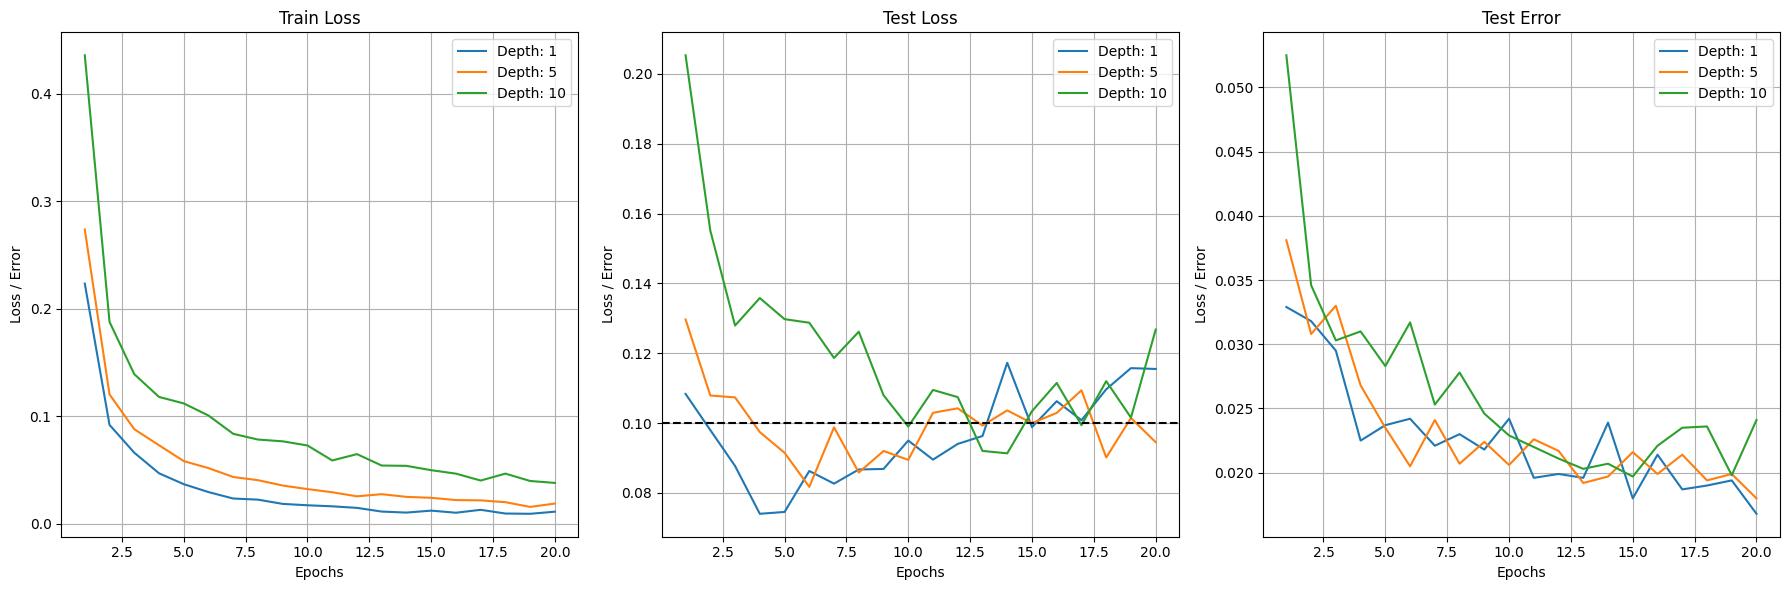

In [12]:
# Plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, depth in enumerate(depths):
    ax[0].plot(range(1, n_epochs+1), train_losses[i], label=f'Depth: {depth}')
    ax[1].plot(range(1, n_epochs+1), test_losses[i], label=f'Depth: {depth}')
    ax[2].plot(range(1, n_epochs+1), test_errors[i], label=f'Depth: {depth}')

ax[0].set_title('Train Loss')
ax[1].set_title('Test Loss')
ax[2].set_title('Test Error')

for i in range(3):
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Loss / Error')

for i in range(3):
    ax[i].grid(True)

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')
ax[1].axhline(y=0.1, color='black', linestyle='--')

plt.tight_layout()
plt.show()


In [13]:
depths = [1, 5, 10]
tr_finals = [train_losses[i][-1] for i in range(3)]
ts_finals = [test_losses[i][-1] for i in range(3)]

depth_table = "| Depth | Train Loss | Test Loss |\n"
depth_table += "|-------|------------|-----------|\n"

for d, tr, ts in zip(depths, tr_finals, ts_finals):
  depth_table += f"| {d:02} | {tr:.04f} | {ts:.04f} |\n"

print(depth_table)


| Depth | Train Loss | Test Loss |
|-------|------------|-----------|
| 01 | 0.0110 | 0.1155 |
| 05 | 0.0186 | 0.0945 |
| 10 | 0.0378 | 0.1268 |



| Depth | Train Loss | Test Loss |
|-------|------------|-----------|
| 01 | 0.0110 | 0.1155 |
| 05 | 0.0186 | 0.0945 |
| 10 | 0.0378 | 0.1268 |

Before drawing any conclusions it is vital to note that the backpropogation (i.e the Adam gradient descent method) is a random process, as we take a random batch of the whole dataset during each epoch. Therefore, the pattern seen in the table and illustrated by the plots above is only a "snapshot" and we must train the model repeatedly to make a reliable conclusion on how depth affects the train and test losses.

However, due to time and computational constraints we use the results above to explain the general pattern. Firstly, the table above shows that the train losses increase with depth, while the test losses don't quite follow the same relationship. To get a better picture, we have to analyse the plots.

It is somewhat clear from the train loss plot that the train loss at 10 hidden layers is worse than the other neural networks. The graph shows that the train loss is higher at each epoch, so throughout the training process, the model fails to capture as much information as the shallower neural networks. This implies that they may be harder to train and might require a smaller learning rate. There is also some evidence of overfitting, albeit not so obvious; if we examine the test losses the green line is once again takes the highest value at most epochs. Hence, indicating that the model is failing to generalise well which is most likely a result of the extra hidden layers.

We move on now to the shallowest network, the neural network with only 1 hidden layer. This model has the lowest train loss in the table, but if we look closely the generalisation error i.e. the difference between the test loss and train loss, is the largest. The plot of the test losses illustrates and interesting trajectory - the losses are initially good but they begin to increase after 10 epochs. This could point towards to potential underfitting or poor parameter choices.

In conclusion, I believe that the network with 5 hidden layers is the best performer, in that it provides the best tradeoff between train and test losses. The test error seemingly oscillates about the 0.1 mark, which when compared to the other depths, is a good result.



#### Task 7: Analyse the train and test errors as a function of width

In [14]:
# Define hyperparameters
dim = 28*28
nclass = 10
batch_size = 64
depth = 1
lr = 0.001
n_epochs = 10 # for efficiency
widths = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
train_losses_w = [[] for _ in range(len(widths))]
test_losses_w  = [[] for _ in range(len(widths))]
test_errors_w  = [[] for _ in range(len(widths))]
for i, width in enumerate(widths):
    net = Net(dim, nclass, width, depth)
    optimizer = optim.Adam(net.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    trainloader, testloader = loading_data(batch_size, train_set=train_set_mnist, test_set=test_set_mnist)
    print(f"Width: {width}")
    print("---------------------------------------------------")
    for epoch in range(1, n_epochs+1):
        train_loss = train_epoch(trainloader, net, optimizer, criterion)
        test_loss, test_err = test_epoch(testloader, net, criterion)
        print(f'Epoch: {epoch:03} | Width: {width:02} | Train Loss: {train_loss:.04f} | Test Loss: {test_loss:.04f} | Test Error: {test_err:.04f}')
        train_losses_w[i].append(train_loss)
        test_losses_w[i].append(test_loss)
        test_errors_w[i].append(test_err)
    print("---------------------------------------------------")

Width: 4
---------------------------------------------------
Epoch: 001 | Width: 04 | Train Loss: 0.9877 | Test Loss: 0.6335 | Test Error: 0.1852
Epoch: 002 | Width: 04 | Train Loss: 0.6005 | Test Loss: 0.5613 | Test Error: 0.1655
Epoch: 003 | Width: 04 | Train Loss: 0.5550 | Test Loss: 0.5216 | Test Error: 0.1486
Epoch: 004 | Width: 04 | Train Loss: 0.5269 | Test Loss: 0.5086 | Test Error: 0.1441
Epoch: 005 | Width: 04 | Train Loss: 0.5073 | Test Loss: 0.4903 | Test Error: 0.1384
Epoch: 006 | Width: 04 | Train Loss: 0.4919 | Test Loss: 0.4794 | Test Error: 0.1375
Epoch: 007 | Width: 04 | Train Loss: 0.4801 | Test Loss: 0.4754 | Test Error: 0.1390
Epoch: 008 | Width: 04 | Train Loss: 0.4721 | Test Loss: 0.4663 | Test Error: 0.1337
Epoch: 009 | Width: 04 | Train Loss: 0.4663 | Test Loss: 0.4651 | Test Error: 0.1354
Epoch: 010 | Width: 04 | Train Loss: 0.4617 | Test Loss: 0.4720 | Test Error: 0.1352
---------------------------------------------------
Width: 8
----------------------------

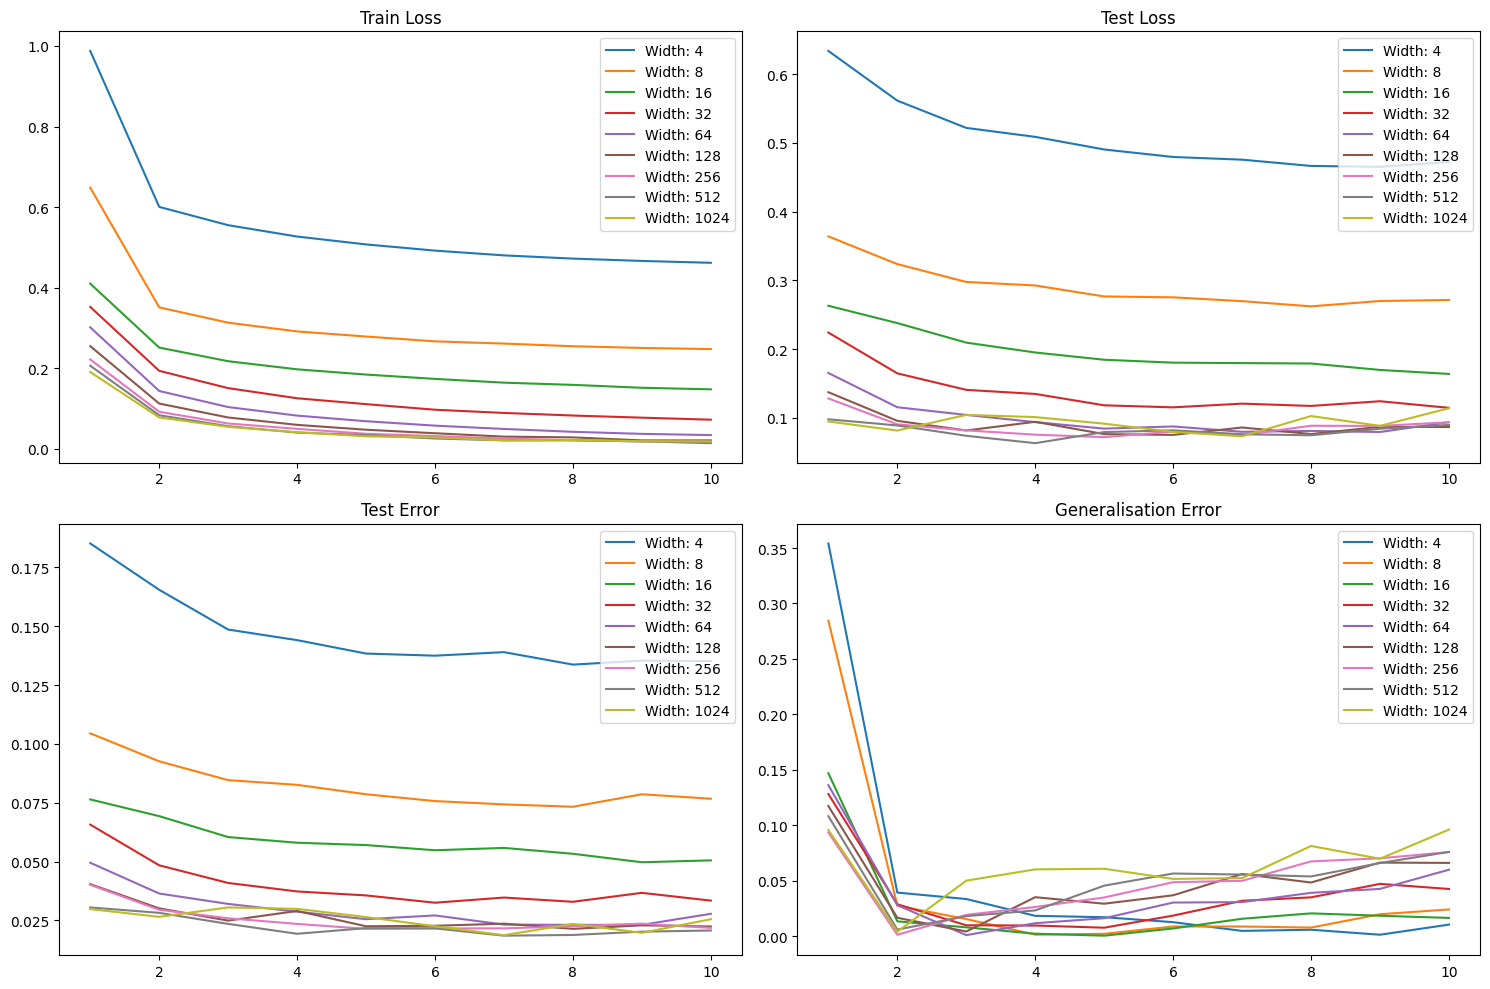

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i, width in enumerate(widths):
    ax[0,0].plot(range(1, len(train_losses_w[i])+1), train_losses_w[i], label=f'Width: {widths[i]}')
    ax[0,1].plot(range(1, len(test_losses_w[i])+1), test_losses_w[i], label=f'Width: {widths[i]}')
    ax[1,0].plot(range(1, len(test_errors_w[i])+1), test_errors_w[i], label=f'Width: {widths[i]}')
    ax[1,1].plot(range(1, len(train_losses_w[i])+1), np.abs(np.array(train_losses_w[i]) - np.array(test_losses_w[i])), label=f'Width: {widths[i]}')
ax[0,0].set_title('Train Loss')
ax[0,1].set_title('Test Loss')
ax[1,0].set_title('Test Error')
ax[1,1].set_title('Generalisation Error')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
plt.tight_layout()

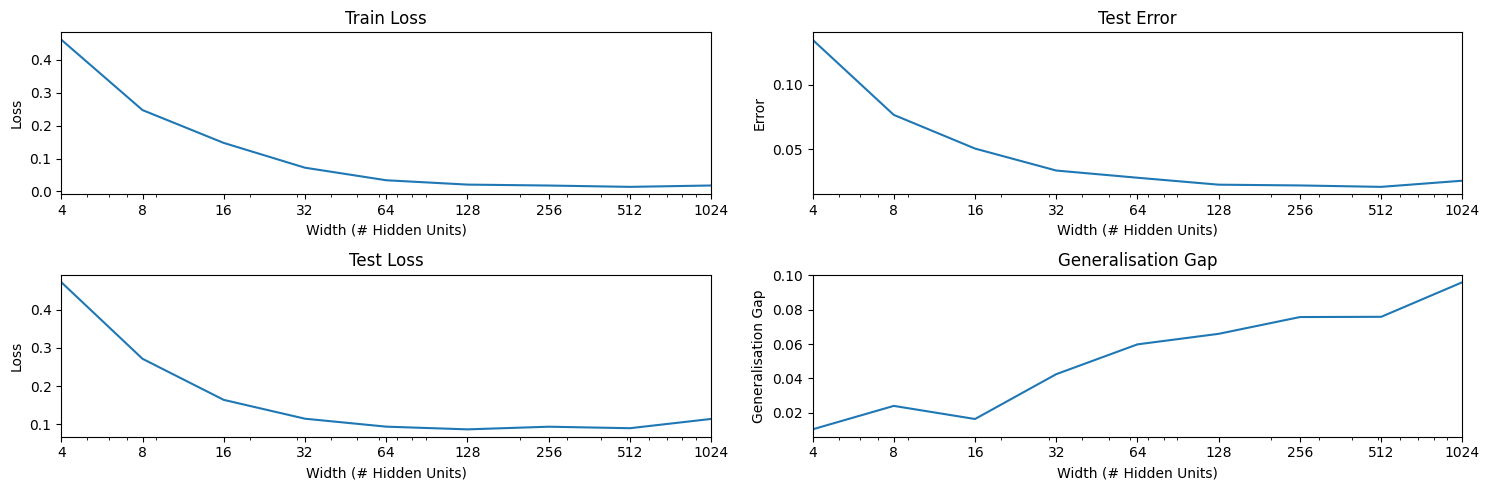

In [31]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(2, 2, figsize=(15, 5))
# plot final losses
ax[0,0].plot(widths, [float(n[-1]) for n in train_losses_w], label=f'Train Loss')
ax[1,0].plot(widths, [float(n[-1]) for n in test_losses_w], label=f'Test Loss')
ax[0,1].plot(widths, [float(n[-1]) for n in test_errors_w], label=f'Test Error')
ax[1,1].plot(widths, np.abs(np.array([float(n[-1]) for n in train_losses_w])-np.array([float(n[-1]) for n in test_losses_w])), label=f'Generalisation Gap')
ax[0,0].set_title('Train Loss')
ax[1,0].set_title('Test Loss')
ax[0,1].set_title('Test Error')
ax[1,1].set_title('Generalisation Gap')
#logscale x axis
ax[0,0].set_xscale('log')
ax[1,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,1].set_xscale('log')
#set axis limits
ax[0,0].set_xlim([min(widths), max(widths)])
ax[1,0].set_xlim([min(widths), max(widths)])
ax[0,1].set_xlim([min(widths), max(widths)])
ax[1,1].set_xlim([min(widths), max(widths)])
#set x ticks
ax[0,0].set_xticks(widths)
ax[1,0].set_xticks(widths)
ax[0,1].set_xticks(widths)
ax[1,1].set_xticks(widths)
#set axis labels
ax[0,0].set_xlabel('Width (# Hidden Units)')
ax[1,0].set_xlabel('Width (# Hidden Units)')
ax[0,0].set_ylabel('Loss')
ax[1,0].set_ylabel('Loss')
ax[0,1].set_xlabel('Width (# Hidden Units)')
ax[0,1].set_ylabel('Error')
ax[1,1].set_xlabel('Width (# Hidden Units)')
ax[1,1].set_ylabel('Generalisation Gap')
ax[0,0].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax[1,0].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax[0,1].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax[1,1].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
plt.tight_layout()

In [16]:
widths =  [4, 8, 16, 32, 64, 128, 256, 512, 1024]
tr_finals_w = [train_losses_w[i][-1] for i in range(9)]
ts_finals_w = [test_losses_w[i][-1] for i in range(9)]

# Generate the markdown table
width_table = "| Width | Train Loss | Test Loss |\n"
width_table += "|-------|------------|-----------|\n"

for w, tr, ts in zip(widths, tr_finals_w, ts_finals_w):
  width_table += f"| {w:02} | {tr:.04f} | {ts:.04f} |\n"

print(width_table)

| Width | Train Loss | Test Loss |
|-------|------------|-----------|
| 04 | 0.4617 | 0.4720 |
| 08 | 0.2474 | 0.2715 |
| 16 | 0.1475 | 0.1639 |
| 32 | 0.0721 | 0.1146 |
| 64 | 0.0339 | 0.0938 |
| 128 | 0.0207 | 0.0867 |
| 256 | 0.0179 | 0.0936 |
| 512 | 0.0138 | 0.0897 |
| 1024 | 0.0180 | 0.1140 |




| Width | Train Loss | Test Loss |
|-------|------------|-----------|
| 04 | 0.4617 | 0.4720 |
| 08 | 0.2474 | 0.2715 |
| 16 | 0.1475 | 0.1639 |
| 32 | 0.0721 | 0.1146 |
| 64 | 0.0339 | 0.0938 |
| 128 | 0.0207 | 0.0867 |
| 256 | 0.0179 | 0.0936 |
| 512 | 0.0138 | 0.0897 |
| 1024 | 0.0180 | 0.1140 |

We begin by analysing the table and the second set of plots, which illustrates how the final loss / error changes with width. As width (i.e the number of neurons in each hidden layer) increases, the train loss decreases and very smoothly. The same can be said for test loss; width and test loss follow and inverse relationship. However, there is some evidence that the test loss starts to increases between 512 and 1024 neurons hinting at potential overfitting. To delve deeper into what might be happening, we turn to the first set of plots which illustrate how the loss / error evolves with epochs. From analysing the test loss vs. epoch graph, we can see that from roughly the 128 mark, the model doesn't really improve its test loss with epochs i.e. we observe a stagnation effect.

Returning back to the second set of plots, there is resounding evidence that the generalisation error increases with the width. This clearly illustrates the overfitting phenomenon, because the train loss decreases smoothly with neurons and so the larger models fail to generalise well to unknown data, meaning that it is getting too accustomed to the data we feed throguh it.

However, that being said, this model was run with the Adam optimizer. Having explored the SGD optimizer, we do observe some implicit bias - the generalisation error seemed to plateau around 32 neurons. This is interesting and potentially something to consider when answering what the ideal width of this neural network would be.

To answer the question, as emphasised several times throughout the module so far, it is important to choose hyperparameters which provide a good tradeoff between overfitting and underfitting. So, we want to choose a model with a low enough train loss and a generalisation error which is under a certain threshold. A common technique used in machine learning is to search for the elbow point, and from the second set of points one can subjectively conclude that the elbow point for train and test loss occurs at 64 neurons. Increasing the width more than that has little or even a detrimental effect to the neural network's performance.

***
***

## Part 4: The link between Neural Networks and Gaussian Processes [8 points]

### Part 4.1: Proving the relationship between a Gaussian process and a neural network [4 points]

### Task 1: Proper weight scaling

If we look at the variance of hidden layer $l$ as $N_{l} → ∞$  we get:

$$\begin{align*}Var[f_i^{(l)}(x)] &= Var[\sum_{j=1}^{N_l} w_{ij}^{(l)} g_j^{(l-1)}(x) + b_i^{(l)}]\\
&= \sum_{j=1}^{N_l} Var[w_{ij}^{(l)}]Var[g_j^{(l-1)}(x)] + Var[b_i^{(l)}]\\
\end{align*}$$

where we assume that the weights are independent of the biases and are i.i.d across layers (which will imply that $w_{ij}^{(l)}$ and $g_j^{(l-1)}(x)$ are independent). Now to show that the variance doesn't diverge, we proceed by induction. We assume that the variance of the previous layer i.e. the post-activation is bounded by some $K$, then:

$$\begin{align*}Var[f_i^{(l)}(x)] &<= N_l C_w^{(l)} K + σ_b^{(l)}\end{align*}$$

So, one can conclude that the variance is governed by the $N_l$ term i.e. as $N_l → ∞$ we get divergence. To combat this, we can scale $C_w^{(l)}$ by dividing by $N_l$ so that the variance of each layer is independent of the number of neurons and the variance becomes bounded.

### Task 2: Derive the GP relation for a single hidden layer

We will define the following vector for $f_i^{(2)}(x)$ for an input vector $x\,$:

$$f_i^{(2)}(x) = w_i^{(2)} \cdot g^{(1)}(x) + b_i^{(2)}$$

where,

$$\begin{align*}f_i^{(2)}(x) &= [f_1^{(2)}(x), f_2^{(2)}(x), \ldots, f_M^{(2)}(x)]^T \\
w_i^{(2)} &= [w_{i1}^{(2)}, w_{i2}^{(2)}, \ldots, w_{iM}^{(2)}] \\
g^{(1)}(x) &= ϕ(w_i^{(1)} \cdot x + b_i^{(1)}) \\
b_i^{(l)} &= [b_{i1}^{(l)}, b_{i2}^{(l)}, \ldots, b_{iM}^{(l)}]^T \end{align*}$$

i.e. $f_i^{(2)}(x)$ is column vector of the pre-activations, $w_i^{(l)}$ is the $i$-th row of the weights matrix, $g^{(1)}(x)$ is the column vector of post activations and $b_i^{(l)}$ is the column vector of biases. We know that the weights and the biases are i.i.d conditional on the input $x$ and thatthe weights are indpendent across layers. The post-activations $g^{(1)}(x)$ are i.i.d, because the vector is a non-linear function of i.i.d random variables. Hence, what we sum over in the dot product is a set of i.i.d items.

Now that we have a sum of i.i.d items we can apply CLT to show that $f_i^{(2)} \sim GP(μ^1, K^1)$ as $N_1 → \infty$. Note, that a gaussian process or a multivariate normal distribution is fully specified by it's first two moments. \\

$E[f^{(1)}(x)] = 0$ because the weights and the biases are zero mean normal distributions. We can now feed this through the equations; $E[g^{(1)}(x)] = 0$ and so $E[f^{(2)}(x)] = 0$.

Recall $Cov[X, Y] = E[XY] - E[X]E[Y]$. We know that in this case $E[X]E[Y]$ is zero because $E[X] = E[Y] =0$ (we have just shown that the mean of this hidden layer is zero). Note also that the biases are indpendent of the weights and so we can rewrite the cross terms within the term $E[XY]$ as the product $E[b_i^{(2)}]E[\sum_{j=1}^{N_1} w_{ij}^{(2)} g_j^{(1)}(x)]$. The biases are a zero mean normal distribution, so we are left with:

$$Cov[f_i^{(2)}(x), f_k^{(2)}(x')] = E[(\sum_{j=1}^{N_1} w_{ij}^{(2)} g_j^{(1)}(x))(\sum_{m=1}^{N_1} w_{km}^{(2)} g_m^{(1)}(x))] + σ_b^{(2)}$$

Where we have used that $E[b_i^{(2)^2}] = σ_b^{(2)}$.

The weights are i.i.d, so we get non-zero terms iff $m=j$ and $k=i$ and which results in:

$$\begin{align*}
Cov[f_i^{(2)}(x), f_i^{(2)}(x')]] &= E[\sum_{j=1}^{N_1} w_{ij}^{(2)^2} g_j^{(1)}(x)g_j^{(1)}(x')] + \sigma_b^{(2)} \\
&= \sum_{j=1}^{N_1} E[w_{ij}^{(2)^2}]E[g_j^{(1)}(x)g_j^{(1)}(x')] + \sigma_b^{(2)} \\
&= N_1 C_w^{(l)} E[g_j^{(1)}(x)g_j^{(1)}(x')] + \sigma_b^{(2)} \\
&= \sigma_w^{(2)} E[g_j^{(1)}(x)g_j^{(1)}(x')] + \sigma_b^{(2)}
\end{align*}$$

using Task 1 in the last part. It is known that the output of the first layer (the post activations) are a Gaussian Process, because they are a (non-linear) function of gaussian distributions i.e. they have mean zero and covariance $K^0$. Hence, we have shown that $f_i^{(2)} \sim N(0, K^1)$ where $K^1$ is the covariance derived above and is thus a Gaussian Process.

### Task 3: Why in succession

The calculations above are based on the inductive hypothesis that the previous layer is also a gaussian process. This follows naturally from the fact that a gaussian process is defined by a gaussian prior, likelihood and posterior. Hence, we require the limits to be applied in succession to continue iteratively applying the inductive hypothesis through the layers and guarantee that the input or prior (at each layer) is a GP.

### Task 4: Derive the GP relation for multiple hidden layers

We will proceed to show the desired results by induction (which seems to be the underlying theme behind this derivation). Firstly, it is important to note that we can apply the CLT in this case because as aforementioned we assume the weights are i.i.d within a particular layer and are independent across different layers. This means that $f_i^{(l)}$ can be expressed as the sum of independent random variables. The post-activations are a non-linear function of the weights of layer $l-1$, which is independent of the weights and biases of layer $l$, and so we have indirectly applied that independence is closed under transformations. With indpendence established along with the previous part outlining how the number of neurons $(N_l) → \infty$, we can invoke the CLT.

We have already showed in task 2 that the recurrence relation holds for a single layer, so we assume it holds for layers up to $l-1$. Now:

$$f_i^{(l)}(x) = ∑_{j=1}^{N_l} w_{ij}^{(l)}g_j^{(l-1)}(x) + b_i^{(l)}$$

Then following the same argument as task 2, we get that $E[f_i^{(l)}] = 0$ and the covariance of any two inputs $x$ and $x'$ is given by:

$$K^{(l)}(x, x') = \sigma_w^{(2)} E[g_i^{(l-1)}(x)g_i^{(l-1)}(x')] + \sigma_b^{(2)}$$

By the inductive hypothesis we know that $g_i^{(l-1)}$ is a Gaussian Process and so has zero mean with a covariance matrix fully described by $K^{(l-1)}(x, x)$, $K^{(l-1)}(x, x')$, $K^{(l-1)}(x', x')$ (i.e. these three terms describe the diagonals and off diagonal entries). Therefore, the recurrence relation is given by:

$$K^{(l)}(x, x') = \sigma_w^{(2)} F[K^{(l-1)}(x, x'), K^{(l-1)}(x, x), K^{(l-1)}(x', x')] + \sigma_b^{(2)}$$ 

where $F$ is some function which depends on the activation function $ϕ$.

***

### Part 4.2: Analysing the performance of the Gaussian process and a neural network [4 points]

#### Data Cleaning:

Choose 1000 entries of only two classes of CIFAR10. Note, we will not normalise the dataset because

In [17]:
# Please use float64 as default dtype for this part of the assignment
torch.set_default_dtype(torch.float64)

# Another hint: when  computing [ K^L(X,X) + noise^2 Id ]^-1 y and  [ K^L(X,X) + noise^2 Id ]^-1 K^L(X,X*)
# You can TRY cholesky solve as it should be p.d. (except case for numerical errors) - maybe you can use try:/except:
# You can also try to enforce symmetry in posterior covariance by doing (K + K.t())/2

In [18]:
# choose indices of desired classes
c1_idx = 0
c2_idx = 1

indices = []

for i, (image, labels) in enumerate(train_set_cifar):
  if labels == c1_idx or labels == c2_idx:
    indices.append(i)

# choose only a 1000 indices
indices = indices[:1000]

train_subset_cifar = torch.utils.data.Subset(train_set_cifar, indices)


#### Task 0: Formulate Classification as a Regression Problem

In [19]:
new_classes = [-0.5, 0.5]

for i, (image, label) in enumerate(train_subset_cifar):
    if label == 0:
        train_subset_cifar.dataset.targets[indices[i]] = -0.5
    else:
        train_subset_cifar.dataset.targets[indices[i]] = 0.5

As discussed in lectures we can perform binary classification using regression (similar to logistic regression) so if the scalar output from our Gaussian Process $y < 0$ then ouptut class label 0 else output class label 1.

In [20]:
# Flatten input
flattened_images = []
labels = []

for image, label in train_subset_cifar:
    flattened_image = image.view(-1)  # Flatten the image tensor
    flattened_images.append(flattened_image)
    labels.append(label)

# Convert the list of flattened images and labels to tensors
train_cifar = torch.stack(flattened_images)
labels_tensor = torch.tensor(labels)

print(train_cifar.shape)

torch.Size([1000, 3072])


#### Task 1: Implement the Kernel of the Gaussian Process

In [21]:
def relu_kernel(L , sw, sb, X1, X2):
  """

  Implementation of the Relu Kernel defined recursively as in the question.

  Inputs:
  L (int): The number of layers
  sw (float): The variance of weights
  sb (float): The variance of bias
  X1 (torch.Tensor): M1 x N0 matrix of datapoints
  X2 (torch.Tensor): M2 x N0 matrix of datapoints

  Outputs:
  K_L (torch.Tensor): M1 x M2 Kernel Matrix
  """
  M1, N0 = X1.shape
  M2, _ = X2.shape

  def K0(x, x1):
    return sb + sw * (torch.matmul(x, x1.T)) / N0

  # Initialise for recursion
  K_12 = K0(X1, X2)
  K_11 = K0(X1, X1)
  K_22 = K0(X2, X2)

  # Apply recursion formula but iteratively
  for l in range(L):
    # Note: when calculating the kernel for the i-th element of X1 with itself
    # We only require the diagonal entries - same argument applies for the j-th element of X2
    # Broadcast to perform element wise multiplication using torch.outer
    sqroot1 = torch.sqrt(torch.outer(torch.diag(K_11), torch.diag(K_22)))
    sqroot2 = torch.sqrt(torch.outer(torch.diag(K_11), torch.diag(K_11)))
    sqroot3 = torch.sqrt(torch.outer(torch.diag(K_22), torch.diag(K_22)))
    # Theta for layer l (python indexing)
    theta = torch.acos(torch.clamp(K_12 / sqroot1, -1.0, 1.0))
    # Update kernels
    K_12 = sb + sw / (2 * torch.pi) * sqroot1 * (torch.sin(theta) + (torch.pi - theta) * torch.cos(theta))
    # Can simplify K_xx and K_yy because the angle inside acos is 1
    # So we can take theta to be zero
    K_11 = sb + (sw / 2) * sqroot2
    K_22 = sb + (sw / 2) * sqroot3

  return K_12

The function above implements the ReLU kernel as defined (recursively) in the problem iteratively. This means that we start off with the base case and iteratively update at each step rather than working backwards such as in recursion.

In order to work out the square root term, one must realise that $K^{l-1}(x, x)$ in the question refers to the kernel being applied to the $i$-th element of $\verb|X1|$ with itself. And so, it suffices to apply $K^{l-1}(\verb|X1|, \verb|X1|)$ and only take the diagonal elements. The same logic applies for $\verb|X2|$. We apply $\verb|torch.outer|$ to these vectors to enforce element-wise multiplication. In this scenario $\verb|torch.outer|$ is equivalent to $\verb|unsqueeze|$ method as seen in tutorial 3. That is it creates a new 2nd axis on the first vector and a new 1st axis on the second and multiplies them using python broadcasting. The reason I used $\verb|torch.outer|$ instead is because I encountered some dimension errors with the $\verb|unsqueeze|$ method which might have been down to the diagonals potentially being storedd as shape $(M_i, 1)$ rather than just $(M_i, \,)$. Unsure about this and did not have time to explore.

Finally, when updating the kernels the formula can be simplified for $K(x, x)$ and by symmetry $K(x', x')$. Note that the angle within $\theta_{x, x}$ is 1 because the square root of $K(x, x)$ multiplied by itself is just $K(x, x)$ which then cancels with the numerator. This then allows us to take $\theta_{x, x} = 0$ being careful that we take the range of its possible values to be $[0, 2π)$.

#### Task 2: Implement a method to compute the mean and covariance of the Gaussian process

In [22]:
def gp_fit(X_train, y_train, X_test, L, sigma, sw, sb):
        """
        Given observations (X, y) and test points X_test, fit a GP model.

        Args:
        X_train (torch.Tensor): Observed features (M1, N0)
        y_train (torch.Tensor): Observed response variables (M1)
        X_test (torch.Tensor): Test points at which predictions will be made (M2, N0)
        L (int): Number of layers
        sigma (float): Noise level in observations

        Returns:
        posterior_mean (torch.Tensor): Posterior mean
        posterior_var (torch.Tensor): Posterior covariance
        """

        # Compute kernel matrices
        k_xs_x   = relu_kernel(L, sw, sb, X_test, X_train)      # m1 x m2
        k_x_xs   = k_xs_x.T                                     # m2 x m1
        k_xs_xs  = relu_kernel(L, sw, sb, X_test, X_test)       # m2 x m2
        k_x_x    = relu_kernel(L, sw, sb, X_train, X_train)     # n x n
        cov_x_x  = k_x_x + sigma**2 * torch.eye(k_x_x.size(0))  # n x n

        # Compute posterior mean and covariance
        posterior_mean = torch.matmul(k_xs_x, torch.linalg.solve(cov_x_x, y_train))
        posterior_var = k_xs_xs - torch.matmul(k_xs_x, torch.linalg.solve(cov_x_x, k_x_xs))

        # -----------------------------------------------------------------------------------
        # Enforce symmetry and positive definiteness that may be lost due to numerical errors
        posterior_var = (posterior_var + posterior_var.T) / 2  # Enforce symmetry
        # Add a small amount of noise to the diagonal to make the covariance matrix positive definite
        posterior_var = posterior_var + 1e-6 * torch.eye(posterior_var.shape[0])
        # -----------------------------------------------------------------------------------

        return posterior_mean, posterior_var

#### Further Data Cleaning

In [23]:
# Repeat the data cleaning process for X_test
test_indices = []

for i, (image, labels) in enumerate(test_set_cifar):
  if labels == 0 or labels == 1:
    test_indices.append(i)

# choose only a 1000 indices
test_indices = test_indices[:1000]

test_subset_cifar = torch.utils.data.Subset(test_set_cifar, test_indices)

# Flatten test
flattened_test = []
test_labels = []

for image, label in test_subset_cifar:
    flattened_image = image.view(-1)
    flattened_test.append(flattened_image)
    test_labels.append(label)

# Convert the list of flattened images and labels to tensors
test_cifar = torch.stack(flattened_test)
test_labels_tensor = torch.tensor(test_labels)

print(test_cifar.shape)

torch.Size([1000, 3072])


#### Task 3: Analyse the performance of the Neural Network Gaussian Process

In [24]:
def predict(posterior_mean):
  """
  A function which outputs the predicted classes using the posterior mean

  Inputs:
  posterior_mean (torch.Tensor): The posterior mean from gp_fit

  Ouptuts:
  y_pred (torch.Tensor): The predicted classes based on criteria
  """
  y_pred = torch.where(posterior_mean <= 0, 0, 1)
  return y_pred

Notice that we don't sample from a Gaussian Distribution 1000 times. This is because, by the law of large numbers the sample mean (the average observation from 1000 samples in this case) converges to the posterior mean. So it suffices to use the posterior mean to predict our classes using the criteria that if $<=0$ we assign it to class 0 else to class 1.

In [25]:
var_arr = [0.01, 0.02, 0.05, 0.08, 0.1, 0.3, 0.7, 1, 2, 5] # this took some experimenting

y_train = labels_tensor
y_test = test_labels_tensor

# Store the results
accuracies = np.zeros(10)
optimal_weights = np.zeros(10)
optimal_biases = np.zeros(10)

# Vary L from 1 to 10
for L in range(1, 11):
  # Grid search for optimal variances for weights and bias at each L
  optimal_sw = None
  optimal_sb = None
  max_accuracy = 0

  for sw in var_arr:
    for sb in var_arr:
      # Set sigma = 0.1
      p_mean, _ = gp_fit(train_cifar, y_train, test_cifar, L, 0.1, sw, sb)
      y_pred = predict(p_mean)
      accuracy = (y_pred == y_test).sum().item() / len(y_test)
      if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimal_sw = sw
        optimal_sb = sb

  posterior_mean, _ = gp_fit(train_cifar, y_train, test_cifar, L, 0.1, optimal_sw, optimal_sb)
  y_pred = predict(posterior_mean)
  accuracy = (y_pred == y_test).sum().item() / len(y_test)
  print(f'L: {L:02} | optimal_sw: {optimal_sw:.03f} | optimal_sb: {optimal_sb:.03f} | accuracy: {accuracy:.04f}')
  accuracies[L-1] = accuracy
  optimal_weights[L-1] = optimal_sw
  optimal_biases[L-1] = optimal_sb


L: 01 | optimal_sw: 1.000 | optimal_sb: 0.050 | accuracy: 0.8540
L: 02 | optimal_sw: 2.000 | optimal_sb: 0.050 | accuracy: 0.8550
L: 03 | optimal_sw: 2.000 | optimal_sb: 0.010 | accuracy: 0.8620
L: 04 | optimal_sw: 2.000 | optimal_sb: 0.020 | accuracy: 0.8660
L: 05 | optimal_sw: 2.000 | optimal_sb: 0.020 | accuracy: 0.8660
L: 06 | optimal_sw: 2.000 | optimal_sb: 0.020 | accuracy: 0.8690
L: 07 | optimal_sw: 2.000 | optimal_sb: 0.020 | accuracy: 0.8710
L: 08 | optimal_sw: 2.000 | optimal_sb: 0.020 | accuracy: 0.8730
L: 09 | optimal_sw: 2.000 | optimal_sb: 0.020 | accuracy: 0.8730
L: 10 | optimal_sw: 2.000 | optimal_sb: 0.010 | accuracy: 0.8720


In [26]:
# Generate the markdown table like above
L_table = "| Layers | Weight Var  | Bias Var | Accuracy |\n"
L_table += "|-------|------------|-----------|-----------|\n"
L_arr = list(range(1, 11))
for L, sw, sb, acc in zip(L_arr, optimal_weights, optimal_biases, accuracies):
    L_table += f"| {L:02} | {sw:.02f} | {sb:.02f} | {acc:.04f} |\n"

print(L_table)

| Layers | Weight Var  | Bias Var | Accuracy |
|-------|------------|-----------|-----------|
| 01 | 1.00 | 0.05 | 0.8540 |
| 02 | 2.00 | 0.05 | 0.8550 |
| 03 | 2.00 | 0.01 | 0.8620 |
| 04 | 2.00 | 0.02 | 0.8660 |
| 05 | 2.00 | 0.02 | 0.8660 |
| 06 | 2.00 | 0.02 | 0.8690 |
| 07 | 2.00 | 0.02 | 0.8710 |
| 08 | 2.00 | 0.02 | 0.8730 |
| 09 | 2.00 | 0.02 | 0.8730 |
| 10 | 2.00 | 0.01 | 0.8720 |



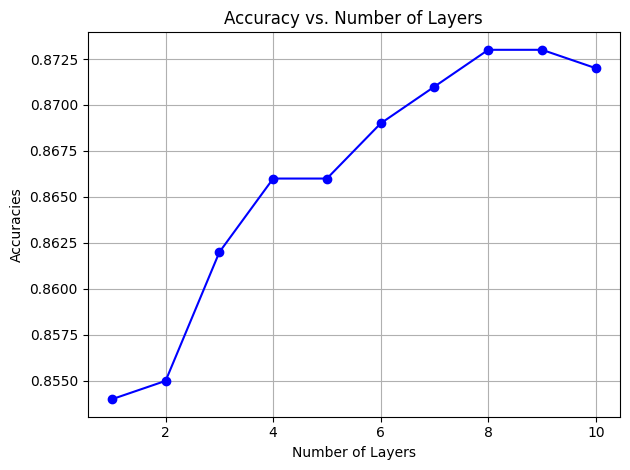

In [27]:
plt.plot(L_arr, accuracies, color='blue', marker='o', linestyle='-')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracies')
plt.title('Accuracy vs. Number of Layers')
plt.grid(True)
plt.tight_layout()
plt.show()

| Layers | Weight Var  | Bias Var | Accuracy |
|-------|------------|-----------|-----------|
| 01 | 1.00 | 0.05 | 0.8540 |
| 02 | 2.00 | 0.05 | 0.8550 |
| 03 | 2.00 | 0.01 | 0.8620 |
| 04 | 2.00 | 0.02 | 0.8660 |
| 05 | 2.00 | 0.02 | 0.8660 |
| 06 | 2.00 | 0.02 | 0.8690 |
| 07 | 2.00 | 0.02 | 0.8710 |
| 08 | 2.00 | 0.02 | 0.8730 |
| 09 | 2.00 | 0.02 | 0.8730 |
| 10 | 2.00 | 0.01 | 0.8720 |

The table above illustrates a slight improvement in predictive classification accuracy within the model as depth increases. There are regions of steep and no improvement between layers but this might be down to the hyperparemeters used, which I touch upon later in this answer. Once the numbers are visualised like in the plot (also above), it is easier to see that the growth in accuracy is very steep initially but then plateaus after roughly 8 layers. This could imply that after a certain depth we no longer improve performance, and signs generally point towards overfitting but this isn't immediately obvious from the results. If we were to overfit in this scenario, the accuracy classification should start to decline, as the model fails to generalise to the unseen test data and classifies based off "memory" and what is has already seen in the train data. However, if we were to extend this to more layers, there might be a more evident relationship.

One thing to note, is that the model is sensitive to the hyperparameters used. The accuracies outputted are the ones which are from the best model at each layer, but this may not be entirely representative of the whole layer. Something that could've been considered would have been to see how the accuracies changed within a layer across the hyperparameter values. The $\sigma_{noise}$ value of 0.1 was used because this was the same value used in tutorial 3, a grid search would have been a good choice to make the rationale of this choice more robust. But due to time and computational constraints, we decided to trust that 0.1 was a perfectly reasonable choice and the high accuracy results do seem to align with this hypothesis.

#### Task 4: Analyse the uncertainty

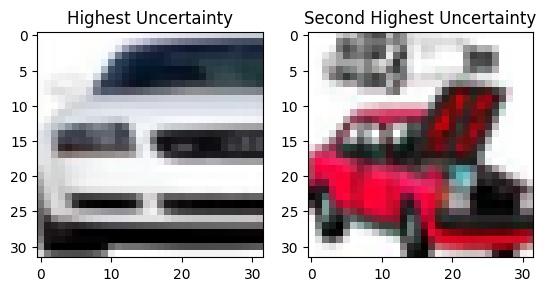

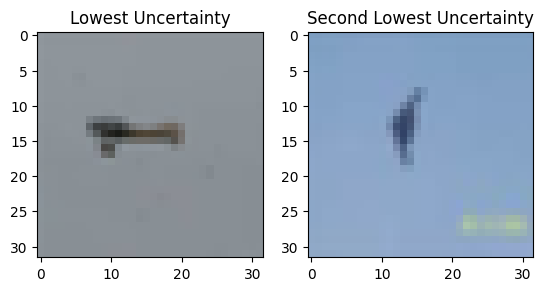

In [28]:
# choose the best model and work out the posterior covariance
# find the top 2 largest and smallest covariances

_, posterior_var = gp_fit(train_cifar, y_train, test_cifar, 8, 0.1, 2, 0.02)

# find max and min covariances - quite misleading but I believe this means the diagonal elements
_, idx_max = torch.topk(torch.diag(posterior_var), k=2)
_, idx_min = torch.topk(torch.diag(posterior_var), k=2, largest=False)


fig1, axs1 = plt.subplots(1, 2)

# have to permute the images because of the way they are stored
axs1[0].imshow(test_subset_cifar[idx_max[0]][0].permute(1, 2, 0))
axs1[0].set_title('Highest Uncertainty')

axs1[1].imshow(test_subset_cifar[idx_max[1]][0].permute(1, 2, 0))
axs1[1].set_title('Second Highest Uncertainty')

fig2, axs2 = plt.subplots(1, 2)

axs2[0].imshow(test_subset_cifar[idx_min[0]][0].permute(1, 2, 0))
axs2[0].set_title('Lowest Uncertainty')

axs2[1].imshow(test_subset_cifar[idx_min[1]][0].permute(1, 2, 0))
axs2[1].set_title('Second Lowest Uncertainty')
plt.show()

#### Task 5: Computational cost analysis

The computational cost of the NNGP model lies in finding the inverse of the covariance matrix which is $O(N^3)$ complexity at each layer, so as the size of the dataset is increased the number of data points $N$ increases and so the cost increases cubically with $N$. The cost of computing the kernel in the asymptotic setting doesn't compare to the cost of the inverse; the cost is $O(N^2l)$ which is only a quadratic relationship.